In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import wordcloud
from wordcloud import WordCloud
from textwrap import wrap
from sklearn import metrics
import contractions

In [3]:
import seaborn as sns

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [6]:
import pickle
import re
import string

In [7]:
df = pd.read_csv('Train.csv')

The reviews are labelled according to the corresponding IMDb ratings of the reviews:- 
Ratings of 7 and above are labelled 1 and considered positive
Ratings lower than 7 are labelled 0 and considered negative
This is done to allow for binary sentiment classification of non-binary data 

In [8]:
print(df.head())
print(df.shape)

                                                text  label
0  I grew up (b. 1965) watching and loving the Th...      0
1  When I put this movie in my DVD player, and sa...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1
(40000, 2)


The dataset consists of 40,000 rows and 2 columns namely, the review and the label

The below graph shows the distribution of the reviews according to label
Since dataset is equaly distributed, we don't need to add weights to the labels

C:\Users\Divij\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

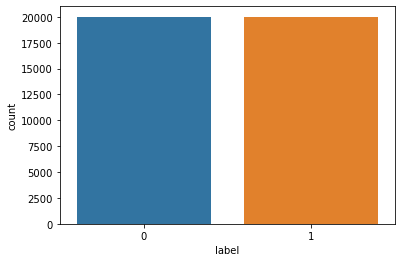

In [9]:
sns.countplot(df.label)

Checking for any null values, none found in the dataset

In [10]:
df.isnull().sum()

text     0
label    0
dtype: int64

Printing reviews chosen randomly to understand the length and formatting: 

In [11]:
for index, text in enumerate(df['text'][79:83]):
    print(text)

Who could possibly have wished for a sequel to Bert I. Gordon's legendary bad trash-film "Food of the Gods"? Nobody, of course, but director Damien Lee thought it was a good idea, anyway, and he put together a belated sequel that stands as one of the most redundant movies in horror history. "Gnaw" is a sequel in name only, as the setting moved to a typical late 80's location (a university campus) and also the cheap & cheesy gore effects perfectly illustrates the 80's. This script hangs together by clichés, awfully written dialogs and plot situations that are not so subtly stolen from other (and more successful) horror classics. Neil Hamilton is a goody two shoes scientist who performs growing-experiments on ordinary rodents in order to do a fellow scientist a favor. Due to some incredibly stupid animal rights activists, the huge and ravenous rats escape and devour pretty much everyone on campus. Following the good old tradition that Spielberg's "Jaws" started, there's an obnoxious Dean

The text has a number of line break characters as well as various punctuation marks

Expanding contractions, punctuations and words with numbers present in text using RegEX and removing all line breaks from the text:

In [12]:
def remove_numbers(text):
    re.sub('\w*\d+\w*', '', text, count = -1)
    return text

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text) #Removes punctuations
    re.sub(' +',' ',text) #Removes extra whitespace
    return text

In [13]:
for ind in df.index:
    review = df['text'][ind]
    review = review.replace('<br />',' ')
    contractions.fix(review)
    review = remove_numbers(review)
    review = remove_punctuation(review)
    df['text'][ind] = review

<ipython-input-13-9f915115e30a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][ind] = review


In [14]:
for index, text in enumerate(df['text'][79:83]):
    print(text)

Who could possibly have wished for a sequel to Bert I Gordons legendary bad trashfilm Food of the Gods Nobody of course but director Damien Lee thought it was a good idea anyway and he put together a belated sequel that stands as one of the most redundant movies in horror history Gnaw is a sequel in name only as the setting moved to a typical late 80s location a university campus and also the cheap  cheesy gore effects perfectly illustrates the 80s This script hangs together by clichés awfully written dialogs and plot situations that are not so subtly stolen from other and more successful horror classics Neil Hamilton is a goody two shoes scientist who performs growingexperiments on ordinary rodents in order to do a fellow scientist a favor Due to some incredibly stupid animal rights activists the huge and ravenous rats escape and devour pretty much everyone on campus Following the good old tradition that Spielbergs Jaws started theres an obnoxious Dean who refuses to admit the problem

Next, stopwords are removed so tokens formed are more informative and dataset size is also decreased

In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

Creating a list of all words in lowercase and converting the tokenized words in review to a list.<br />
Documents is a list wherein each element consists of a list of tokenized words and category of review

In [16]:
documents = []
all_words = []
for ind in df.index:
    review = df['text'][ind]
    word_tokens = word_tokenize(review)
    word_in_rev = []
    for w in word_tokens:
        if w.lower() not in stop_words:
            word_in_rev.append(w.lower())
            all_words.append(w.lower())
    category_in_rev = df['label'][ind]
    documents.append((word_in_rev, category_in_rev))

In [19]:
save_documents = open("pickled_algos/documents.pickle", 'wb')
pickle.dump(documents, save_documents)
save_documents.close()

In [17]:
print(documents[23:26])

[(['never', 'really', 'understood', 'controversy', 'hype', 'movie', 'caused', 'especially', 'french', 'neighboring', 'countries', 'belgium', 'located', 'example', 'baisemoi', 'announced', 'shocking', 'thoughtprovoking', 'social', 'drama', 'could', 'ever', 'experience', 'yeah', 'right', 'might', 'little', 'shocking', 'maybe', 'often', 'see', 'someone', 'getting', 'shot', 'arse', 'weak', 'pointless', 'plot', 'surely', 'didnt', 'cause', 'think', 'much', 'baisemoi', 'another', 'one', 'blame', 'everything', 'goes', 'wrong', 'societyfilms', 'theyre', 'generally', 'convincing', '99', 'people', 'functions', 'perfectly', 'well', 'society', 'would', 'blame', 'exact', 'society', 'vile', 'hopeless', 'acts', 'two', 'deranged', 'nymphgirls', 'two', 'main', 'characters', 'miserable', 'lives', 'introduced', 'separately', 'flashes', 'nadine', 'killed', 'roommate', 'manu', 'shot', 'brother', 'two', 'meet', 'abandoned', 'trainstation', 'late', 'night', 'decide', 'travel', 'around', 'france', 'together', 

In [18]:
all_words = nltk.FreqDist(all_words)

In [19]:
print(len(all_words))

147416


As part of the exploratory data analysis, plotted the wordcloud for top 250 words in the dataset

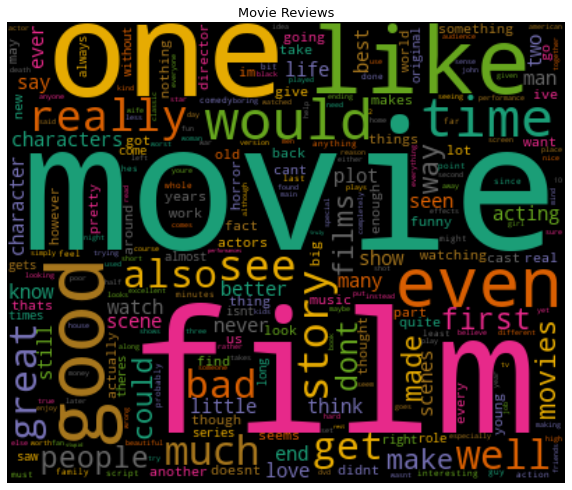

In [20]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=250,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,38))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
    
generate_wordcloud(all_words, 'Movie Reviews')

In [21]:
words_as_feats = list(all_words.keys())[:5000]

In [22]:
print(words_as_feats[:8])

['grew', 'b', '1965', 'watching', 'loving', 'thunderbirds', 'mates', 'school']


In [24]:
save_word_features = open("pickled_algos/word_features5k.pickle", 'wb')
pickle.dump(words_as_feats, save_word_features)
save_word_features.close()

In [23]:
def find_features(review):
    words_in_doc = set(review)
    features = {}
    for w in words_as_feats:
        features[w] = (w in words_in_doc)
    return features

In [24]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [25]:
print(featuresets[23:25])

[({'grew': False, 'b': False, '1965': False, 'watching': False, 'loving': False, 'thunderbirds': False, 'mates': False, 'school': False, 'watched': False, 'played': False, 'lunch': False, 'wanted': False, 'virgil': False, 'scott': False, 'one': True, 'alan': False, 'counting': False, '5': False, 'became': False, 'art': False, 'form': False, 'took': False, 'children': False, 'see': True, 'movie': True, 'hoping': False, 'would': True, 'get': False, 'glimpse': False, 'loved': False, 'child': False, 'bitterly': False, 'disappointing': False, 'high': False, 'point': False, 'snappy': False, 'theme': False, 'tune': False, 'could': True, 'compare': False, 'original': False, 'score': False, 'thankfully': False, 'early': False, 'saturday': False, 'mornings': False, 'television': False, 'channel': False, 'still': False, 'plays': False, 'reruns': False, 'series': False, 'gerry': False, 'anderson': False, 'wife': False, 'created': False, 'jonatha': False, 'frakes': False, 'hand': False, 'directors'

In [27]:
save_features = open("pickled_algos/featuresets.pickle", 'wb')
pickle.dump(featuresets, save_features)
save_features.close()

In [26]:
df_test = pd.read_csv('Test.csv')

for ind in df_test.index:
    review = df_test['text'][ind]
    review = review.replace('<br />',' ')
    contractions.fix(review)
    review = remove_numbers(review)
    review = remove_punctuation(review)
    df_test['text'][ind] = review
    
document_test = []

for ind in df_test.index:
    review = df_test['text'][ind]
    word_tokens = word_tokenize(review)
    word_in_rev = []
    for w in word_tokens:
        if w.lower() not in stop_words:
            word_in_rev.append(w.lower())
    category_in_rev = df_test['label'][ind]
    document_test.append((word_in_rev, category_in_rev))
testing_set = [(find_features(rev), category) for (rev, category) in document_test]

<ipython-input-26-6685c4f4c126>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text'][ind] = review


In [48]:
clf = nltk.NaiveBayesClassifier.train(featuresets)
print(nltk.classify.accuracy(clf, testing_set))

0.8544


We get an accuracy of 85.44% using Naive-Bayes Classifier for this sentiment analysis. The model takes approximately 11 minutes to train

In [31]:
save_clf = open("pickled_algos/ReviewClassifier_NaiveBayes.pickle", 'wb')
pickle.dump(clf, save_clf)
save_clf.close

<function BufferedWriter.close>

In [17]:
open_clf = open("pickled_algos/ReviewClassifier_NaiveBayes.pickle", "rb")
clf = pickle.load(open_clf)
open_clf.close()

In [18]:
clf.show_most_informative_features(50)

Most Informative Features
                     310 = True                0 : 1      =     38.9 : 1.0
                     410 = True                0 : 1      =     35.3 : 1.0
                 stinker = True                0 : 1      =     24.5 : 1.0
                     710 = True                1 : 0      =     20.3 : 1.0
                  wrists = True                0 : 1      =     15.6 : 1.0
                   waste = True                0 : 1      =     14.6 : 1.0
                   grint = True                1 : 0      =     14.4 : 1.0
            decapitation = True                0 : 1      =     14.3 : 1.0
              unengaging = True                0 : 1      =     13.6 : 1.0
                 unfunny = True                0 : 1      =     12.9 : 1.0
                  razzie = True                0 : 1      =     11.4 : 1.0
                concorde = True                0 : 1      =     11.0 : 1.0
                  wayans = True                0 : 1      =     10.4 : 1.0

Comparing this classifier with other popular binary classifiers:-

In [50]:
from sklearn.metrics import f1_score

In [51]:
print(len(testing_set))

5000


In [52]:
y_true = [category for (features, category) in testing_set]
y_pred = [clf.classify(features) for (features, category) in testing_set]

In [53]:
print(f1_score(y_true, y_pred))

0.8573667711598747


Plotting the Confusion Matrix:-

<AxesSubplot:>

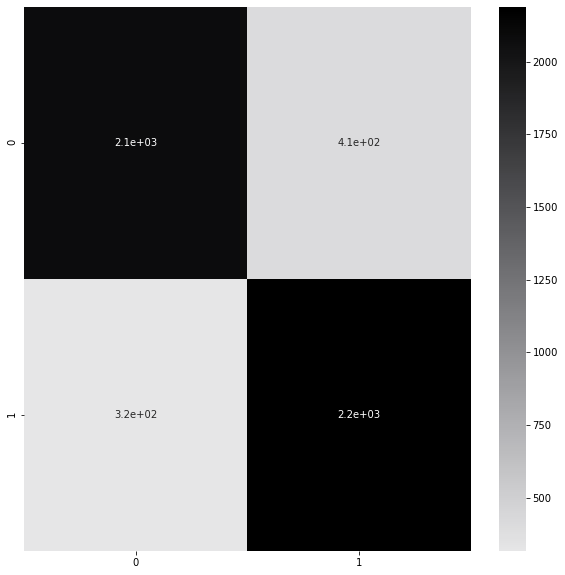

In [54]:
cm = metrics.confusion_matrix(y_true, y_pred)
plt.figure(figsize = (10,10))
cmap = sns.cubehelix_palette(50, hue = 0.05, rot = 0, light = 0.9, dark = 0, as_cmap=True)
sns.heatmap(cm,cmap=cmap, annot=True)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LogisticRegressionClf = SklearnClassifier(LogisticRegression(max_iter=1000))
LogisticRegressionClf.train(featuresets)
print("Accuracy: ", nltk.classify.accuracy(LogisticRegressionClf, testing_set))

Accuracy:  0.8708


The training time for this classifier for almost the same. It also gave a higher accuracy score(87.12) in comparison to Naive-Bayes.<br />
However, we get a failed to converge warning, so retraining with more max_iterations and a different optimizer to see how that will impact the classification:-<br/>
optimizer = 'saga' gives accuracy = 87.14% but ConvergenceWarning still exists(15 min)<br/>
optimizer = 'saga' max_iter = 1000 gives accuracy = 87.16% <br />
Using default optimizer at max_iter = 1000 resolves the Convergance issue at gives an accuracy of 87.08%

In [30]:
LogisticRegressionClf = SklearnClassifier(LogisticRegression(solver = 'saga', max_iter = 1000))
LogisticRegressionClf.train(featuresets)
print("Accuracy: ", nltk.classify.accuracy(LogisticRegressionClf, testing_set))

Accuracy:  0.8716


In [31]:
save_lr = open("pickled_algos/ReviewClassifier_LogisticRegIter.pickle", 'wb')
pickle.dump(LogisticRegressionClf, save_lr)
save_lr.close()

Similiarly, using a Support Vector Classifier:- <br/>
Linear SVC: Liblinear failed to converge; Accuracy = 85.88% <br />
LinearSVC: max_iter = 5000 converges with an accuracy of 86.2%

In [22]:
from sklearn.svm import LinearSVC

In [23]:
LinSVclf = SklearnClassifier(LinearSVC(max_iter=5000))
LinSVclf.train(featuresets)
print("Accuracy: ", nltk.classify.accuracy(LinSVclf, testing_set))

Accuracy:  0.862


In [24]:
save_lsvc = open("pickled_algos/ReviewClassifier_LinSVC.pickle5000", 'wb')
pickle.dump(LinSVclf, save_lsvc)
save_lsvc.close()

Additionally, testing out the utility of adding word embeddings to the dataset and then training it on Naive-Bayes CLassifier:-

In [27]:
print(df.head())
print(df_test.head())

                                                text  label
0  I grew up b 1965 watching and loving the Thund...      0
1  When I put this movie in my DVD player and sat...      0
2  Why do people who do not know what a particula...      0
3  Even though I have great interest in Biblical ...      0
4  Im a die hard Dads Army fan and nothing will e...      1
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 1272002  3 out of 10DirSteve Purce...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang Secre...      1
4  when i first read about berlin am meer i didnt...      0


Defining the testing and training sets for the word embedding

In [29]:
X_train = df.text
y_train = df.label

X_test = df_test.text
y_test = df_test.label

Using a Term Frequncy-Inverse Document Frequency Vectorizer object since that takes into account the most commonly used words without giving a huge importance to stopwords like 'and' an 'the' so it picks up the right important features for embedding:

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
vect = TfidfVectorizer()
vector_train = vect.fit_transform(X_train)

In [47]:
vector_test = vect.transform(X_test)

In [45]:
from sklearn.naive_bayes import BernoulliNB

In [46]:
bernoullinbclf = BernoulliNB()
bernoullinbclf.fit(X = vector_train, y = y_train)

BernoulliNB()

In [48]:
print(f"Accuracy for Bernoulli Naive-Bayes with word embedding: {bernoullinbclf.score(vector_test, y_test)}")

Accuracy for Bernoulli Naive-Bayes with word embedding: 0.8606


A pretty high accuracy of 86.06% is achieved using this method. 

Printing Confusion Matrix for the Bernoulli NB Classifier:-

<AxesSubplot:>

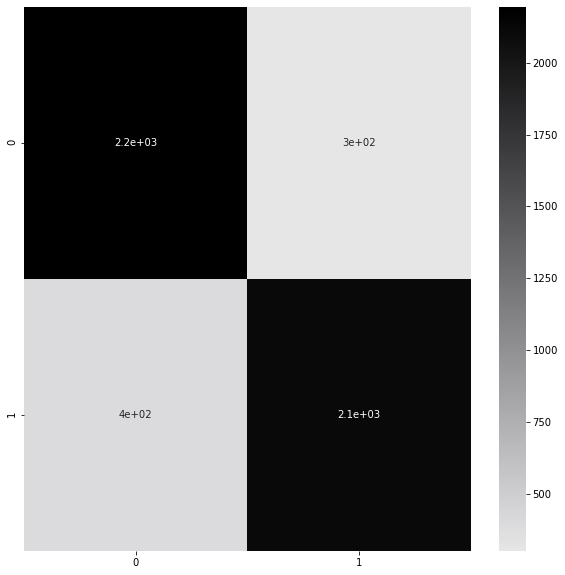

In [54]:
cm = metrics.confusion_matrix(y_test, bernoullinbclf.predict(vector_test))
plt.figure(figsize = (10,10))
cmap = sns.cubehelix_palette(50, hue = 0.05, rot = 0, light = 0.9, dark = 0, as_cmap=True)
sns.heatmap(cm,cmap=cmap, annot=True)